In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
df=pd.read_csv("city_hour.csv")

In [3]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [6]:
df.sem()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4532\1459226325.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sem()


PM2.5      0.099615
PM10       0.162546
NO         0.041740
NO2        0.037942
NOx        0.051995
NH3        0.043698
CO         0.013917
SO2        0.025404
O3         0.039183
Benzene    0.022307
Toluene    0.031146
Xylene     0.015606
AQI        0.213086
dtype: float64

In [7]:
df.var()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4532\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


PM2.5       5584.647042
PM10       10862.798936
NO          1030.102549
NO2          850.433588
NOx         1580.592706
NH3          831.278464
CO           120.352188
SO2          372.703865
O3           888.420227
Benzene      270.819639
Toluene      472.672100
Xylene        61.384586
AQI        26280.536796
dtype: float64

In [13]:
df.median()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4532\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PM2.5       46.42
PM10        91.50
NO           7.96
NO2         20.32
NOx         20.79
NH3         15.38
CO           0.80
SO2          8.37
O3          26.24
Benzene      0.86
Toluene      2.59
Xylene       0.79
AQI        116.00
dtype: float64

In [12]:
df.mode()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2020-03-11 09:00:00,56.0,94.0,2.0,3.5,0.0,10.0,0.0,5.5,16.48,0.0,0.0,0.0,102.0,Moderate
1,Bengaluru,2020-03-11 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chennai,2020-03-11 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,2020-03-11 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lucknow,2020-03-11 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,NaN,2020-06-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2676,NaN,2020-06-30 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2677,NaN,2020-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2678,NaN,2020-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4532\4033294746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness=df.skew()


PM2.5       4.305194
PM10        2.508670
NO          5.384720
NO2         3.343168
NOx         3.687974
NH3         5.244020
CO         20.852959
SO2         4.436795
O3          1.693519
Benzene    22.511603
Toluene    11.494659
Xylene     13.693196
AQI         6.381367
dtype: float64


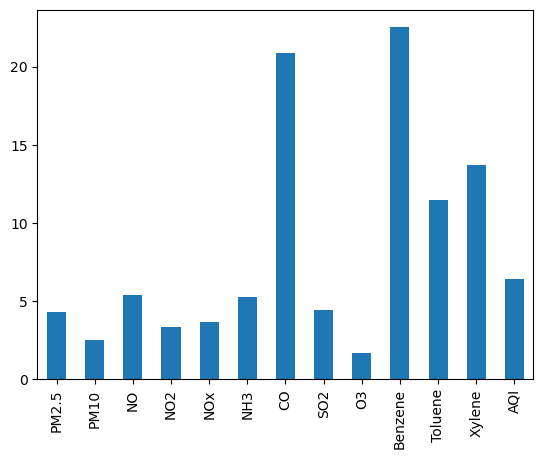

In [8]:
skewness=df.skew()
print(skewness)
skewness.plot(kind='bar')
plt.show()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4532\1025669927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = df.kurtosis()


PM2.5       32.710409
PM10         9.640628
NO          41.136902
NO2         20.679073
NOx         20.452373
NH3         47.561480
CO         586.319178
SO2         26.105521
O3           4.371522
Benzene    573.292866
Toluene    200.963168
Xylene     419.405803
AQI         75.439063
dtype: float64


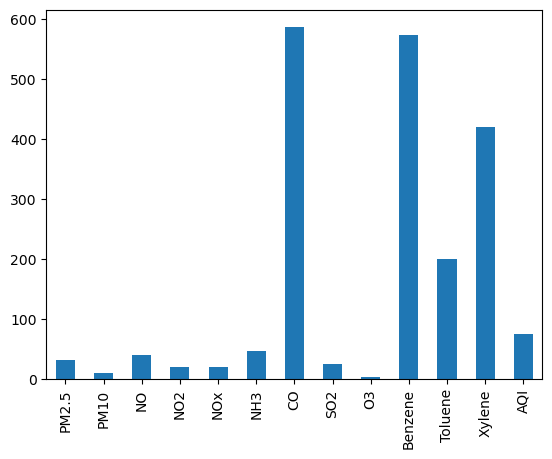

In [9]:
kurt = df.kurtosis()
print(kurt)
kurt.plot(kind='bar')
plt.show()

In [5]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [3]:
df['PM2.5'] = df['PM2.5'].fillna(df.groupby('City')['PM2.5'].transform('mean'))
df['PM10'] = df['PM10'].fillna(df.groupby('City')['PM10'].transform('mean'))
df['NO'] = df['NO'].fillna(df.groupby('City')['NO'].transform('mean'))
df['NO2'] = df['NO2'].fillna(df.groupby('City')['NO2'].transform('mean'))
df['NOx'] = df['NOx'].fillna(df.groupby('City')['NOx'].transform('mean'))
df['NH3'] = df['NH3'].fillna(df.groupby('City')['NH3'].transform('mean'))
df['CO'] = df['CO'].fillna(df.groupby('City')['CO'].transform('mean'))
df['SO2'] = df['SO2'].fillna(df.groupby('City')['SO2'].transform('mean'))
df['O3'] = df['O3'].fillna(df.groupby('City')['O3'].transform('mean'))
df['Benzene'] = df['Benzene'].fillna(df.groupby('City')['Benzene'].transform('mean'))
df['Toluene'] = df['Toluene'].fillna(df.groupby('City')['Toluene'].transform('mean'))
df['Xylene'] = df['Xylene'].fillna(df.groupby('City')['Xylene'].transform('mean'))

In [7]:
df.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10           48192
NO                 0
NO2                0
NOx            28025
NH3            48192
CO                 0
SO2                0
O3              3852
Benzene        65433
Toluene        96049
Xylene        312656
AQI           129080
AQI_Bucket    129080
dtype: int64

In [4]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))

In [9]:
df.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI           129080
AQI_Bucket    129080
dtype: int64

In [5]:
df['Datetime'].apply(pd.to_datetime)
df.set_index('Datetime',inplace=True)

In [6]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Ahmedabad,67.273271,111.493008,1.00,40.01,36.37,17.48,1.00,122.07,39.067821,0.0,0.0,0.0,NaN,NaN
2015-01-01 02:00:00,Ahmedabad,67.273271,111.493008,0.02,27.75,19.73,17.48,0.02,85.90,39.067821,0.0,0.0,0.0,NaN,NaN
2015-01-01 03:00:00,Ahmedabad,67.273271,111.493008,0.08,19.32,11.08,17.48,0.08,52.83,39.067821,0.0,0.0,0.0,NaN,NaN
2015-01-01 04:00:00,Ahmedabad,67.273271,111.493008,0.30,16.45,9.20,17.48,0.30,39.53,153.580000,0.0,0.0,0.0,NaN,NaN
2015-01-01 05:00:00,Ahmedabad,67.273271,111.493008,0.12,14.90,7.85,17.48,0.12,32.63,39.067821,0.0,0.0,0.0,NaN,NaN


In [7]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0
df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [8]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [9]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [10]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [11]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [12]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [13]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [14]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis=1)))

In [15]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Ahmedabad,67.273271,111.493008,1.00,40.01,36.37,17.48,1.00,122.070000,39.067821,...,0.000000,123.0,NaN,107.333333,123.333333,114.000000,45.00,4.25,50.0,39.000000
2015-01-01 02:00:00,Ahmedabad,67.273271,111.493008,0.02,27.75,19.73,17.48,0.02,85.900000,39.067821,...,0.000000,123.0,NaN,107.333333,123.333333,101.666667,23.75,4.25,0.0,39.000000
2015-01-01 03:00:00,Ahmedabad,67.273271,111.493008,0.08,19.32,11.08,17.48,0.08,52.830000,39.067821,...,0.000000,123.0,NaN,107.333333,123.333333,65.000000,13.75,4.25,0.0,39.000000
2015-01-01 04:00:00,Ahmedabad,67.273271,111.493008,0.30,16.45,9.20,17.48,0.30,39.530000,153.580000,...,0.000000,178.0,NaN,107.333333,123.333333,48.750000,11.25,4.25,0.0,177.941176
2015-01-01 05:00:00,Ahmedabad,67.273271,111.493008,0.12,14.90,7.85,17.48,0.12,32.630000,39.067821,...,0.000000,123.0,NaN,107.333333,123.333333,40.000000,8.75,4.25,0.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 20:00:00,Visakhapatnam,9.500000,36.000000,2.75,25.57,15.85,4.57,0.62,12.750689,27.750000,...,2.725523,51.0,Satisfactory,36.000000,15.000000,15.000000,18.75,1.00,0.0,27.000000
2020-06-30 21:00:00,Visakhapatnam,17.250000,49.250000,3.62,33.20,20.62,3.78,0.76,2.020000,25.580000,...,2.725523,51.0,Satisfactory,49.000000,28.333333,2.500000,25.00,0.75,0.0,25.000000
2020-06-30 22:00:00,Visakhapatnam,36.000000,71.000000,2.20,30.80,18.20,3.67,0.58,1.770000,26.150000,...,2.725523,50.0,Good,71.000000,60.000000,1.250000,22.50,0.75,0.0,26.000000


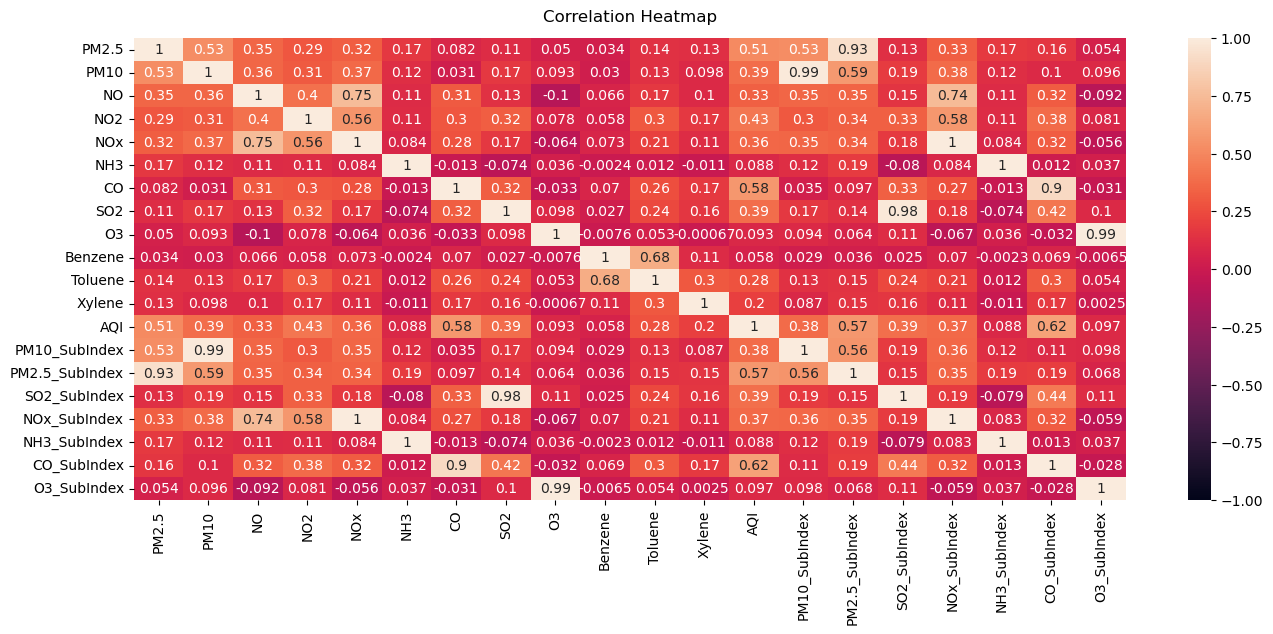

In [16]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [17]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [18]:
df_city_hour = df.copy()
df_city_hour.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

Distribution of different pollutants in last 5 years


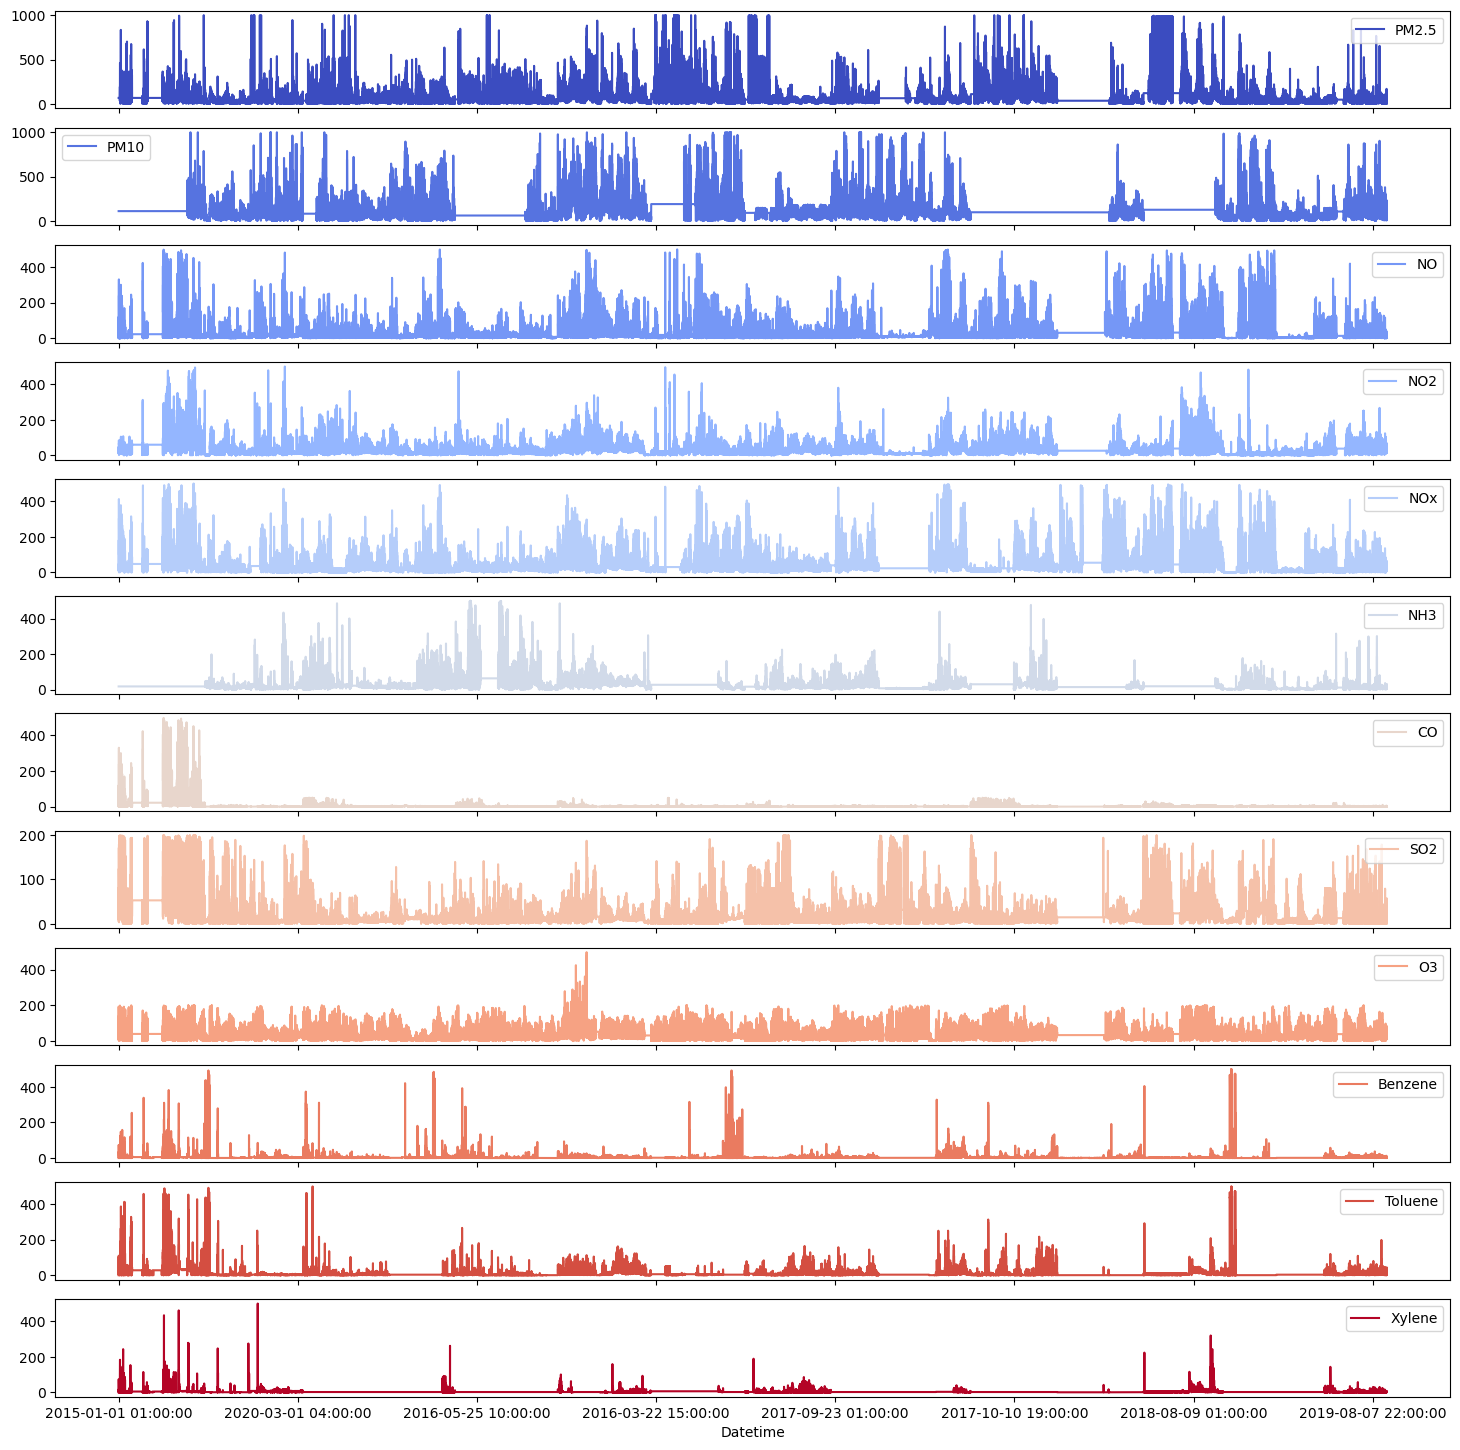

In [19]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_hour = df_city_hour[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_hour.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

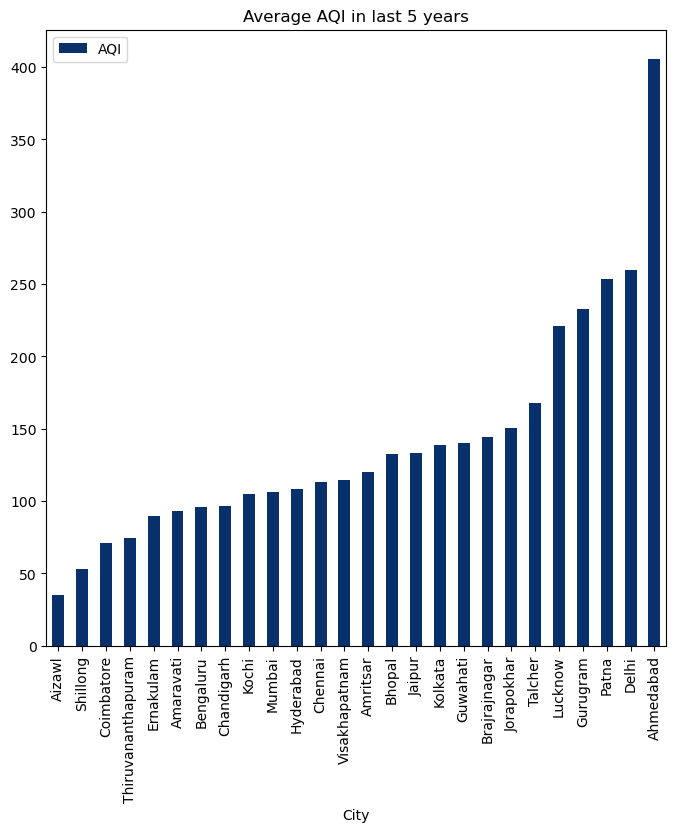

In [20]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [33]:
X=df[["PM2.5", "PM10", "SO2", "NOx","NH3", "CO", "O3", 'Benzene', 'Toluene', 'Xylene']]
y=df[['AQI']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [35]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
predicted=linreg.predict(X_test)

In [36]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 93.66555165240875
R_squared: 0.6106331906406477
Mean absolute error : 48.597740283036764


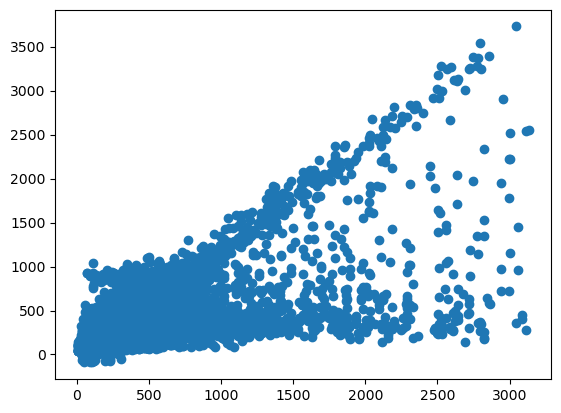

In [37]:
plt.scatter(y_test,predicted)

In [38]:
X1=df[['CO','PM2.5']]
y1=df[['AQI']]

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=40)

In [40]:
linreg=LinearRegression()
linreg.fit(X1_train,y_train)
predicted=linreg.predict(X1_test)

In [41]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 99.93967526960104
R_squared: 0.5567231961850124
Mean absolute error : 52.40520757583827


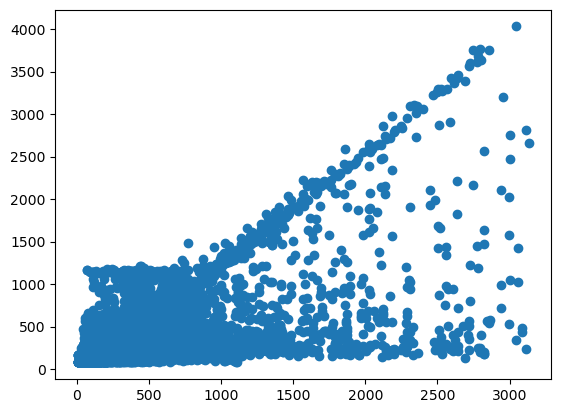

In [42]:
plt.scatter(y_test,predicted)